<a href="https://colab.research.google.com/github/JonathanPuertaG/Challenge2-TelecomX/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Telecom X está enfrentando una alta tasa de cancelaciones de clientes. Este análisis tiene como objetivo identificar los factores que influyen en la evasión (churn) para apoyar decisiones estratégicas y el desarrollo de modelos predictivos.

### Objetivos específicos

- Comprender el comportamiento de los clientes que cancelan el servicio.
- Detectar patrones y características asociadas al churn.
- Visualizar tendencias clave y generar insights para la retención.


##📌 Extracción

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


> El dataset contiene algunas columnas con estructura anidada (diccionarios) que deben ser transformadas antes del análisis.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##🔧 Transformación


Las columnas `customer`, `phone`, `internet` y `account` contienen diccionarios. Para convertirlas en columnas individuales, usé `pandas.json_normalize()`:


In [3]:
# Normalizar columnas anidadas
df_plano  = pd.json_normalize(df['customer'])
phone_data = pd.json_normalize(df['phone'])
internet_data = pd.json_normalize(df['internet'])
account_data = pd.json_normalize(df['account'])

# Concatenar columnas planas
df_final = pd.concat(
    [df[['customerID', 'Churn']],
     df_plano ,
     phone_data,
     internet_data,
     account_data],
    axis=1
)

df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


> Ahora contamos con un DataFrame plano, donde cada columna representa una variable única, lo que facilita el análisis exploratorio.


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
#No se evidencian valores nulos, sin embargo es necesario validar valores vacíos (espacios o cadenas vacías)
df_final['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
,224


In [6]:
## Como se identificaron valores vacios en la columna churn es necesario validarlo para las demas columnas
for col in df_final.columns:
    print(f"\n🔍 Columna: {col}")
    print(df_final[col].value_counts(dropna=False))



🔍 Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

🔍 Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🔍 Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

🔍 Columna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

🔍 Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

🔍 Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

🔍 Columna: tenure
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

🔍 Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

🔍 Columna: MultipleLines
MultipleLines
No                  3495
Yes    

In [7]:
# 1.Corregir tipo de dato en 'Charges.Total'
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print(df_final['Charges.Total'].dtype)

float64


In [8]:
#2. Reemplazar valores vacíos o solo espacios por NaN
df_final.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


In [9]:
# 3. Verificar y mostrar valores nulos por columna
print("Valores nulos por columna:")
print(df_final.isna().sum())

Valores nulos por columna:
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [10]:
# 4. Eliminar registros con 'Churn' nulo
df_final = df_final.dropna(subset=['Churn'])

In [11]:
# 5. Eliminar registros donde 'Charges.Total' quedó como NaN tras la conversión
df_final = df_final.dropna(subset=['Charges.Total'])

In [12]:
# 6. Conversión del tipo 'Charges.Total' (ya se hizo), aseguramos el tipo
df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)

/tmp/ipython-input-12-2203340147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].astype(float)


In [13]:
# 7. Revision de duplicados
print(df_final.duplicated().sum())

0


In [14]:
# 8. Resetear el índice después de eliminar filas
df_final.reset_index(drop=True, inplace=True)

In [15]:
# 9. Vista general del DataFrame limpio
print("\nVista general del DataFrame limpio:")
print(df_final.info())
print(df_final.head())


Vista general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contr

In [16]:
# Creamos la columna "Cuentas_Diarias"
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Verificamos las primeras filas
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()


/tmp/ipython-input-16-3337739536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [17]:
df_final[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].sample(5)


,customerID,Charges.Monthly,Cuentas_Diarias
5378,7601-DHFWZ,24.0,0.800000
4519,6379-RXJRQ,70.1,2.336667
4603,6505-OZNPG,63.4,2.113333
4357,6161-UUUTA,79.9,2.663333
6988,9931-KGHOA,55.0,1.833333


##📊 Carga y análisis

### 🔢 Resumen estadístico general

In [18]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### 🧮 Distribución de variables categóricas

In [19]:
df_final['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.421502
Yes,26.578498


In [20]:
df_final['Contract'].value_counts(normalize=True) * 100

,proportion
Contract,
Month-to-month,55.105233
Two year,23.961889
One year,20.932878


In [21]:
df_final['InternetService'].value_counts(normalize=True) * 100

,proportion
InternetService,
Fiber optic,44.027304
DSL,34.357224
No,21.615472


In [22]:
df_final['gender'].value_counts(normalize=True) * 100

,proportion
gender,
Male,50.469283
Female,49.530717


### 📈 Visualizaciones para el Análisis Descriptivo

In [23]:
# crear rangos para tenure
df_final['rango_tenure'] = pd.cut(df_final['tenure'],
                                 bins=[0, 6, 12, 24, 36, 48, 60, 72],
                                 labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'],
                                 right=True)

In [52]:
def graficar_abandono(columna_grupo, titulo, xlabel):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Calcular conteo por grupo y Churn
    tabla = df_final.groupby([columna_grupo, 'Churn'], observed=False).size().reset_index(name='count')

    # Pivotear para que cada grupo tenga columnas separadas 'Yes' y 'No'
    tabla_pivot = tabla.pivot(index=columna_grupo, columns='Churn', values='count').fillna(0)

    # Asegurar columnas 'Yes' y 'No' estén presentes
    if 'Yes' not in tabla_pivot.columns:
        tabla_pivot['Yes'] = 0
    if 'No' not in tabla_pivot.columns:
        tabla_pivot['No'] = 0

    # Calcular total y porcentaje por grupo
    tabla_pivot['Total'] = tabla_pivot['Yes'] + tabla_pivot['No']
    tabla_pivot['ChurnPercent'] = (tabla_pivot['Yes'] / tabla_pivot['Total'] * 100).round(1)

    # Gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    tabla_pivot[['No', 'Yes']].plot(kind='bar', stacked=False, ax=ax, color=['#8dd3c7', '#fb8072'])

    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Número de Clientes")
    ax.legend(title='Churn')
    plt.xticks(rotation=45)

    # Añadir número de clientes sobre cada barra
    for i, grupo in enumerate(tabla_pivot.index):
        no_val = tabla_pivot.loc[grupo, 'No']
        yes_val = tabla_pivot.loc[grupo, 'Yes']

        # Posiciones relativas
        x_base = i

        ax.text(x_base - 0.15, no_val + 10, int(no_val), ha='center', fontsize=9)
        ax.text(x_base + 0.15, yes_val + 10, int(yes_val), ha='center', fontsize=9)

        # Porcentaje de abandono (Yes)
        ax.text(x_base + 0.15, yes_val + 90,
                f"{tabla_pivot.loc[grupo, 'ChurnPercent']}%",
                ha='center', fontsize=10, color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()



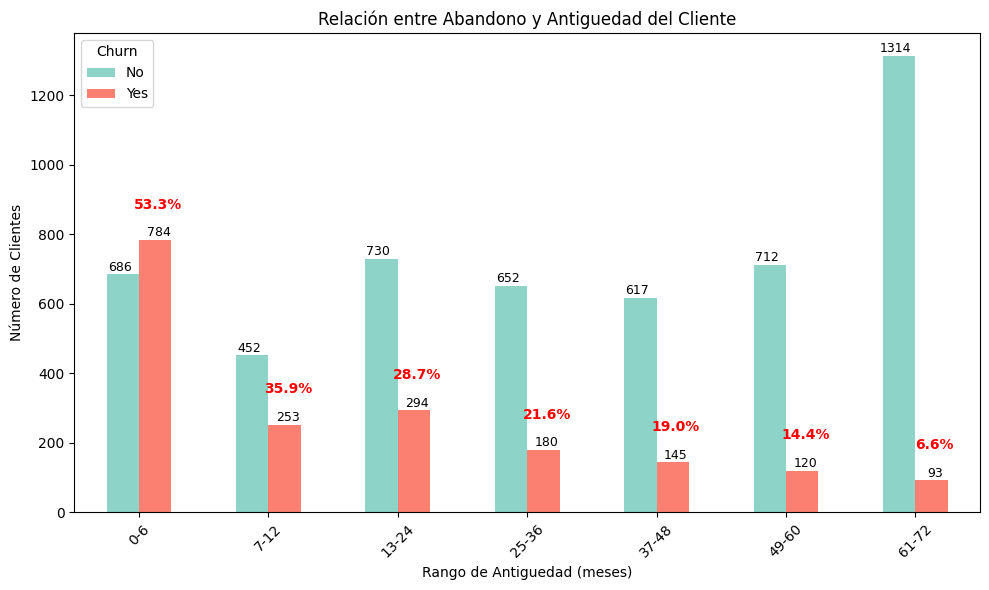

In [54]:
graficar_abandono('rango_tenure', 'Relación entre Abandono y Antiguedad del Cliente', 'Rango de Antiguedad (meses)')

Relación entre Abandono y Antiguedad

Los clientes con menor antiguedad (0-6 meses) presentan la tasa más alta de abandono (53%). A medida que aumenta el tiempo de permanencia, el porcentaje de abandono disminuye de forma constante, estabilizándose por debajo del 25% después de los 2 años. Esto sugiere que los esfuerzos de retención deben enfocarse especialmente en los primeros meses del ciclo de vida del cliente.


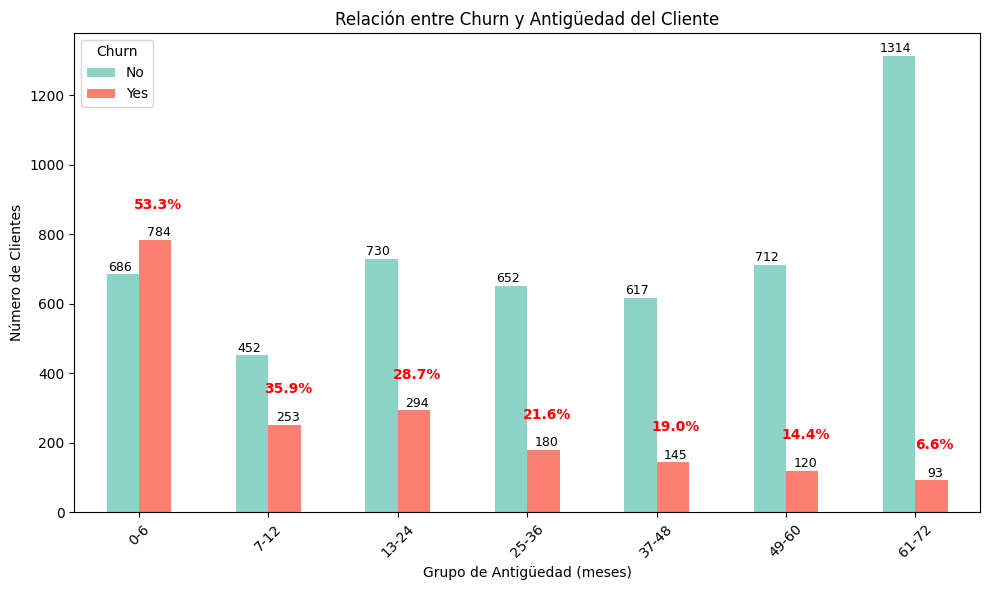

In [55]:
graficar_abandono('rango_tenure', 'Relación entre Churn y Antigüedad del Cliente', 'Grupo de Antigüedad (meses)')

##📄Informe final